TASK-2 : MOVIE RATING PREDICTION  
Author : Sunita Sahu  
Domain : Data Science  
Aim : To build a model that predicts movie ratings based on user preferences and movie features using data science methodology.

Importing Important Libraries

In [43]:
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DOWNLOADING DATASETS

In [44]:
file_path = 'Movie_preprocessed.csv'
df_movie = pd.read_csv(file_path, engine='python', encoding='latin1', header=None, names=['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor1', 'Actor2', 'Actor3'])
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor1,Actor2,Actor3
0,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
2,#Gadhvi (He thought he was Gandhi),-2019,109 min,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,-2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Aur Pyaar Ho Gaya,-1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
7,...Yahaan,-2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma


In [45]:
df_movie.shape

(5660, 10)

In [46]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5660 entries, 0 to 15509
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      5660 non-null   object
 1   Year      5660 non-null   object
 2   Duration  5660 non-null   object
 3   Genre     5660 non-null   object
 4   Rating    5660 non-null   object
 5   Votes     5660 non-null   object
 6   Director  5660 non-null   object
 7   Actor1    5660 non-null   object
 8   Actor2    5660 non-null   object
 9   Actor3    5660 non-null   object
dtypes: object(10)
memory usage: 486.4+ KB


This code defines a function, missing_values_percent,which calculates the percentage of missing values in a given dataset using pandas.The result is presented in a Dataframe, aiding in the identification and handling of missing data during the data analysis process.

In [47]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe)*100).round(2)
    result_movie = pd.DataFrame({'Missing values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'
    return result_movie
result = missing_values_percent(df_movie)
result

,Missing values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor1,0,0.0%
Actor2,0,0.0%
Actor3,0,0.0%


Removes the 'Actor 2' and 'Actor 3 coumns from the Dataframe 'df_movie', drops rows with missing values in the 'Duration' column, and filters out rows with more than 5 missing values in other columns. Calls the 'missing_values_percent' function on the modifed 'Data' to generate a DataFrame displaying the cound and percentage of missing values for each variable in the dataset.

In [48]:
df_movie.drop(['Actor2', 'Actor3'], axis=1, inplace=True)
df_movie.dropna(subset=['Duration'], inplace=True)
df_movie = df_movie[df_movie.isnull().sum(axis=1).sort_values(ascending=False)<=5]
missing_values_percent(df_movie)

,Missing values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor1,0,0.0%


The code snippet cleans and analyzes a movie dataset. It starts by removing rows with missing rating and voting information. Then, it examines director and genre data, identifying top directors and common genres. Missing director and genre values are filled with placeholders. Similarly, it analyzes primary actors, filling missing values. Finally, it creates a summary of missing data percentages.

In [49]:
df_movie.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = df_movie['Director'].describe()

director_counts = df_movie['Director'].value_counts().sort_values(ascending=False)
df_movie['Director'].fillna('rajmouli', inplace=True)

genre_counts = df_movie['Genre'].value_counts().sort_values(ascending=False)
df_movie['Genre'].fillna('rajmouli', inplace=True)

actor1_description = df_movie['Actor1'].describe()
df_movie['Actor1'].fillna('mahesh babu', inplace=True)

missing_values_df=pd.DataFrame({
    'Missing Values':df_movie.isnull().sum(),
    'Percentage': (df_movie.isnull().sum()/len(df_movie)*100).round(2)
     })
df_movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor1
15494,Zubaan,-2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15495,Zubeidaa,-2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15504,Zulm Ki Zanjeer,-1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15506,Zulmi,-1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15509,Zulm-O-Sitam,-1998,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


Again checking for missing values

In [50]:
missing_values_percent(df_movie)

,Missing values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor1,0,0.0%


The provided code snippet conducts preprocessing operations on the 'Year' and 'Duration' columns within the df_movie DataFrame. Firstly, it converts the 'Year' column values into strings using the astype() function to ensure uniform data type handling. Subsequently, the str.replace() function is employed, aided by a regular expression (r'[()]'), to eliminate any parentheses present within the 'Year' values. Likewise, the 'Duration' column undergoes a similar treatment where the str.replace() function, facilitated by a regular expression (r'min'), removes the string 'min' from the duration values. Following these preprocessing steps, the info() method is invoked to present a concise summary of the DataFrame, encompassing pertinent details such as column data types and any missing values. These preparatory measures are crucial for enhancing data consistency and integrity, thereby laying a robust foundation for subsequent analytical tasks or modeling endeavors.



In [51]:
df_movie['Year'] = df_movie['Year'].astype(str).str.replace(r'[()]', '', regex=True)
df_movie['Duration'] = df_movie['Duration'].str.replace(r'min', '', regex=True)
df_movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5660 entries, 0 to 15509
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      5660 non-null   object
 1   Year      5660 non-null   object
 2   Duration  5660 non-null   object
 3   Genre     5660 non-null   object
 4   Rating    5660 non-null   object
 5   Votes     5660 non-null   object
 6   Director  5660 non-null   object
 7   Actor1    5660 non-null   object
dtypes: object(8)
memory usage: 398.0+ KB


This code snippet demonstrates the process of cleaning and transforming a DataFrame column containing movie durations with mixed data types (numeric strings, non-numeric strings, and missing values). It begins by creating a DataFrame with a column named 'Duration' that includes valid numeric strings ('100', '90', '120', '105'), non-numeric strings ('N/A', 'two hours'), and a missing value (None). The code then converts the 'Duration' column to a numeric type using `pd.to_numeric` with the `errors='coerce'` argument, which converts invalid parsing (non-numeric strings) into `NaN` (missing values). It prints the count of these `NaN` values to show how many non-numeric entries were present. Next, it calculates the mean of the numeric values in the 'Duration' column, ignoring the `NaN` values. The `NaN` values are then replaced with this calculated mean, and the column is converted to integers. Finally, it prints the count of `NaN` values after filling, verifying that there are no more missing values. This process ensures that the 'Duration' column contains only integer values, making it suitable for further analysis or processing.

In [52]:
df_movie = pd.DataFrame(df_movie)
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'], errors='coerce')
print(df_movie['Duration'].isnull().sum())
mean_duration = df_movie['Duration'].mean()
df_movie['Duration'] = df_movie['Duration'].fillna(mean_duration).astype(int)
print(df_movie['Duration'].isnull().sum())

1
0


This code snippet performs several data preprocessing steps on the `df_movie` DataFrame. Firstly, it converts the 'Year' and 'Duration' columns to numeric type, handling any non-convertible values by coercing them to NaN. Next, it drops rows with NaN values in either the 'Year' or 'Duration' columns to ensure data integrity. Then, it converts the 'Votes' column to integer type after removing commas from the values. Finally, it displays information about the DataFrame using `df_movie.info()` to verify the changes. These preprocessing steps are crucial for ensuring data consistency and preparing the DataFrame for further analysis or modeling.

In [61]:
df_movie['Year'] = pd.to_numeric(df_movie['Year'], errors='coerce')
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'], errors='coerce')

df_movie.dropna(subset=['Year', 'Duration'], inplace=True)
df_movie['Votes'] = df_movie['Votes'].astype(str).str.replace(',', '').astype(int)

df_movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 2 to 15509
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   object 
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor1    5659 non-null   object 
dtypes: float64(1), int32(2), object(5)
memory usage: 353.7+ KB


EXPLARATORY DATA ANALYSIS.[EDA]

PLOT USING MATPLOTLIB

This code segment utilizes Matplotlib to visualize the distribution of movies over the years. Initially, a figure is created with a size of 20x10 inches using `plt.figure(figsize=(20,10))`. Subsequently, the number of movies per year is computed and sorted in ascending order. The years and their corresponding movie counts are then extracted from the computed values. Using `plt.plot()`, a line plot is generated with markers representing each data point. The plot is titled 'Number of Movies Per Year', with labeled axes denoting the year and the number of movies, respectively. Finally, the plot is displayed using `plt.show()`. This visualization aids in understanding the trend and distribution of movies over the years, providing valuable insights into the dataset.

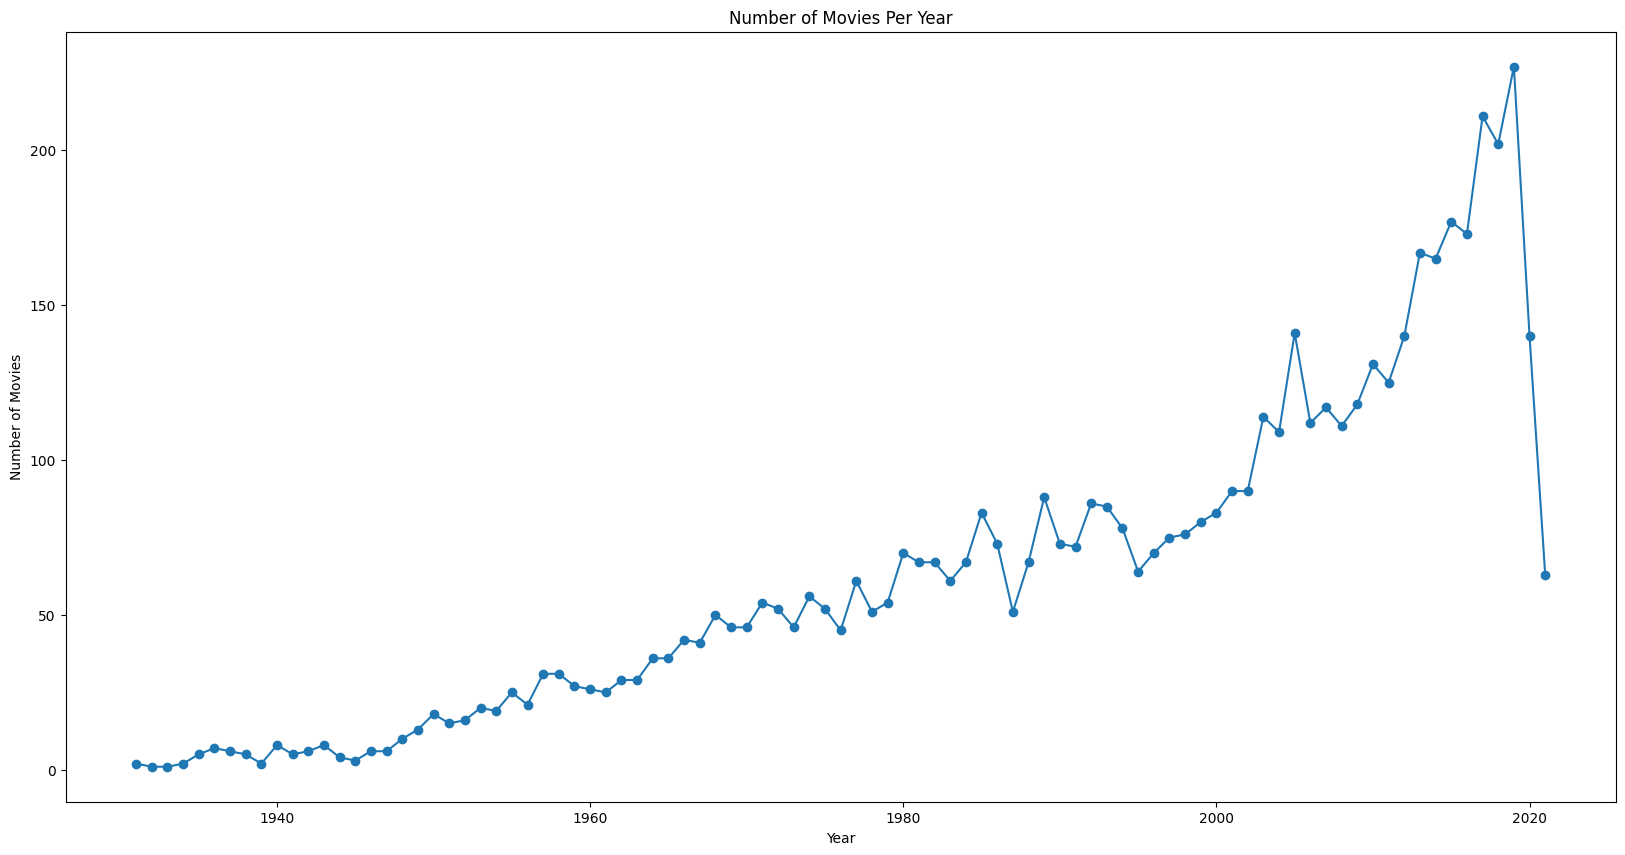

In [62]:
plt.figure(figsize=(20,10))

year_counts = df_movie['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years,year_counts, marker='o')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()


Pie Chart for our Data

This code segment generates a pie chart to visualize the distribution of movie genres in the `df_movie` DataFrame. Initially, the `value_counts()` method is applied to the "Genre" column to compute the frequency of each genre, and the genre labels and corresponding sizes are stored in the variables `label` and `sizes`, respectively. A square figure with dimensions 10x10 inches is created using `plt.figure(figsize=(10,10))`. Then, `plt.pie()` is used to create the pie chart, with `sizes` representing the sizes of each genre slice, `label` providing the labels for each slice, `startangle` setting the angle at which the pie chart starts, `shadow` determining whether to display shadows, and `autopct` specifying the format for percentage labels on each slice. Finally, `plt.show()` is called to display the pie chart. This visualization offers a clear representation of the proportion of each genre in the movie dataset, facilitating easy interpretation of genre distribution trends.

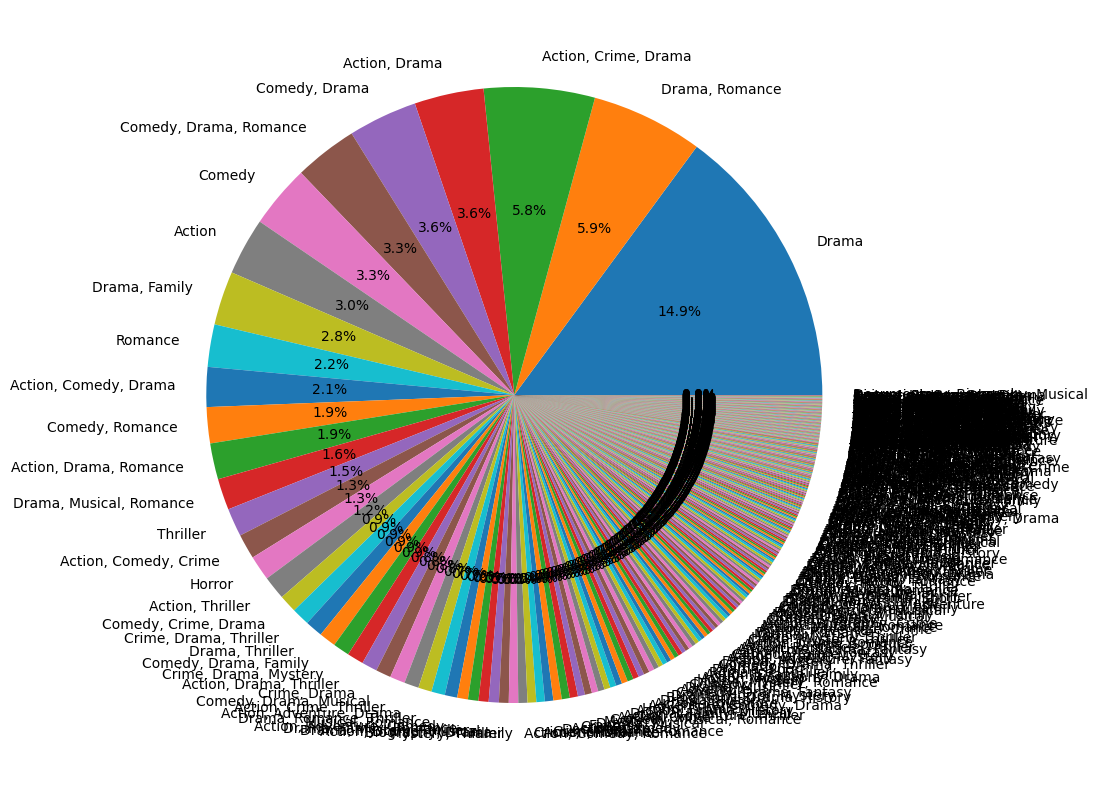

In [64]:
label = df_movie["Genre"].value_counts().index
sizes = df_movie["Genre"].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=label, startangle = 0, shadow = False, autopct='%1.1f%%')
plt.show()

This code segment utilizes the Plotly Express library to create a scatter plot visualization of the relationship between movie ratings and the number of votes they received. The `px.scatter()` function is employed to generate the scatter plot. The 'Rating' column is assigned to the x-axis, the 'Votes' column to the y-axis, and the 'Rating' column is used for color-coding the data points. Additionally, the `color_continuous_scale` parameter is set to 'Plasma' from the Plotly color scale library to provide a continuous color scale for the color-coding based on ratings. The title of the plot is specified as 'Rating Versus Votes', with HTML `<b>` tags used for bold formatting. This visualization allows for the exploration of any potential correlation between movie ratings and the number of votes they have received, facilitating insights into audience engagement and preferences.

In [65]:
px.scatter(df_movie,x='Rating',y='Votes',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Votes')

This code segment utilizes Plotly Express to create a scatter plot visualization depicting the relationship between movie ratings and their durations. The `px.scatter()` function is used to generate the scatter plot. The 'Rating' column is assigned to the x-axis, the 'Duration' column to the y-axis, and the 'Rating' column is utilized for color-coding the data points. Additionally, the `color_continuous_scale` parameter is set to 'Plasma' from the Plotly color scale library, providing a continuous color scale for the color-coding based on ratings. The title of the plot is specified as 'Rating Versus Duration', with HTML `<b>` tags used for bold formatting. This visualization enables the exploration of potential relationships between movie ratings and their durations, offering insights into any trends or patterns that may exist.

In [66]:
px.scatter(df_movie,x='Rating',y='Duration',color='Rating',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Rating Versus Duration')

BUILDING MODELS

The code segment first converts the 'Rating' column to numeric data type, drops rows with missing or non-numeric ratings, and then calculates the mean rating for each genre. If both 'Genre' and 'Rating' columns exist, it computes the mean rating for each genre using the `groupby()` function. The resulting mean ratings are stored in a new column named 'Genre_mean_rating'. Finally, the code prints the first few rows of the DataFrame with the newly added column. This process provides insights into genre-wise rating trends in the dataset.

In [74]:
df_movie['Rating'] = pd.to_numeric(df_movie['Rating'], errors='coerce')
df_movie.dropna(subset=['Rating'], inplace=True)
if 'Genre' in df_movie.columns and 'Rating' in df_movie.columns:
    try:
        genre_mean_rating = df_movie.groupby('Genre')['Rating'].transform('mean')
        df_movie['Genre_mean_rating'] = genre_mean_rating
    except Exception as e:
        print("Error:", e)
else:
    print("Error: 'Genre' or 'Rating' column is missing.")
print(df_movie.head())


                                 Name    Year  Duration  \
2  #Gadhvi (He thought he was Gandhi)  2019.0       109   
4                             #Yaaram  2019.0       110   
6                ...Aur Pyaar Ho Gaya  1997.0       147   
7                           ...Yahaan  2005.0       142   
9                  ?: A Question Mark  2012.0        82   

                       Genre  Rating  Votes        Director           Actor1  \
2                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
4            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
6     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
7        Drama, Romance, War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
9  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

   Genre_mean_rating  
2           6.415521  
4           5.716822  
6           6.242222  
7           6.820000  
9           5.477778  


The provided code performs multiple tasks related to building and evaluating a linear regression model for predicting movie ratings. 

Firstly, it calculates the mean rating for each director and actor based on the ratings they received across all movies in the dataset. These mean ratings are then used to encode the director and actor features.

Next, it defines the features (`x`) and target variable (`y`) for the regression model, including features such as year, votes, duration, genre_mean_rating, director_encoded, and actor_encoded.

After splitting the data into training and test sets, a Linear Regression model is initialized and trained using the training data.

Predictions are made on the test set, and the model is evaluated using mean squared error, mean absolute error, and R-squared score. These evaluation metrics provide insights into the performance of the regression model.

Additionally, scatter plots are created to visualize the relationship between actual and predicted ratings, as well as a residual plot to assess the distribution of errors. Histogram of residuals is also plotted to visualize their distribution.

Overall, this code segment encompasses feature engineering, model training, prediction, evaluation, and visualization steps essential for building and assessing a linear regression model for predicting movie ratings.

Mean Squared Error: 0.5242
Mean Absolute Error: 0.5283
R2 Score: 0.7169


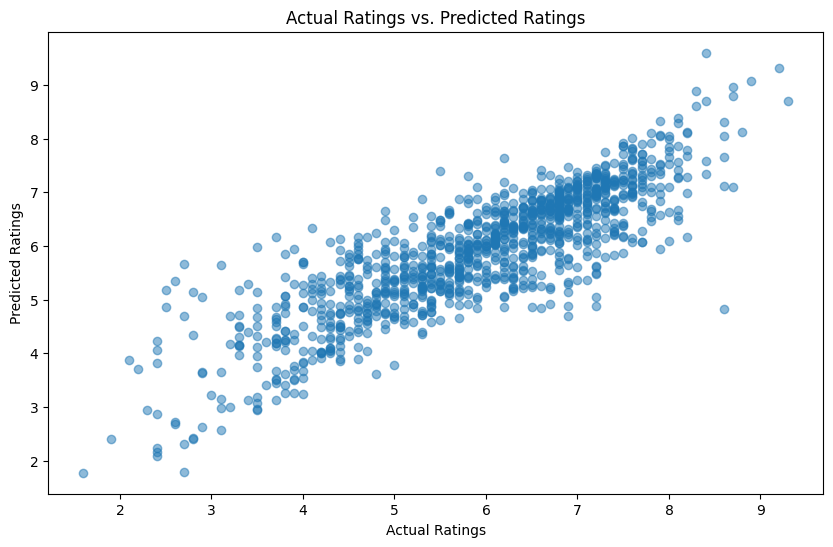

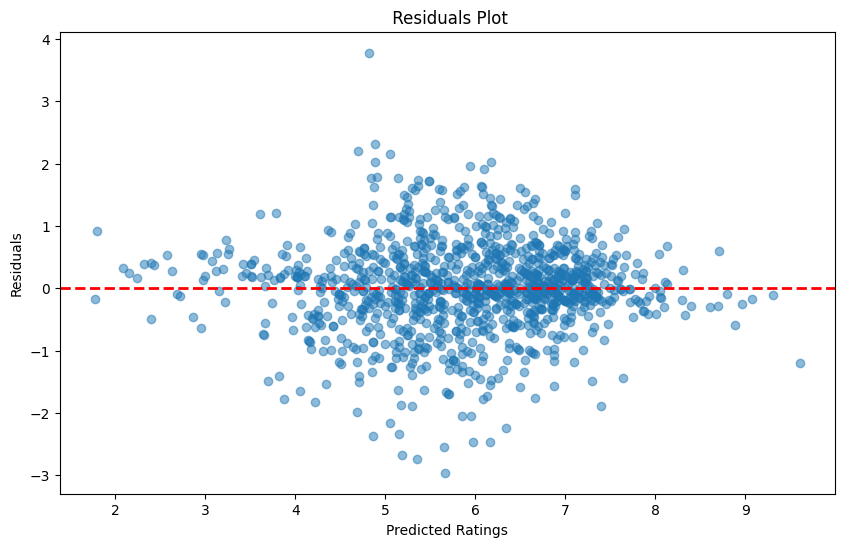

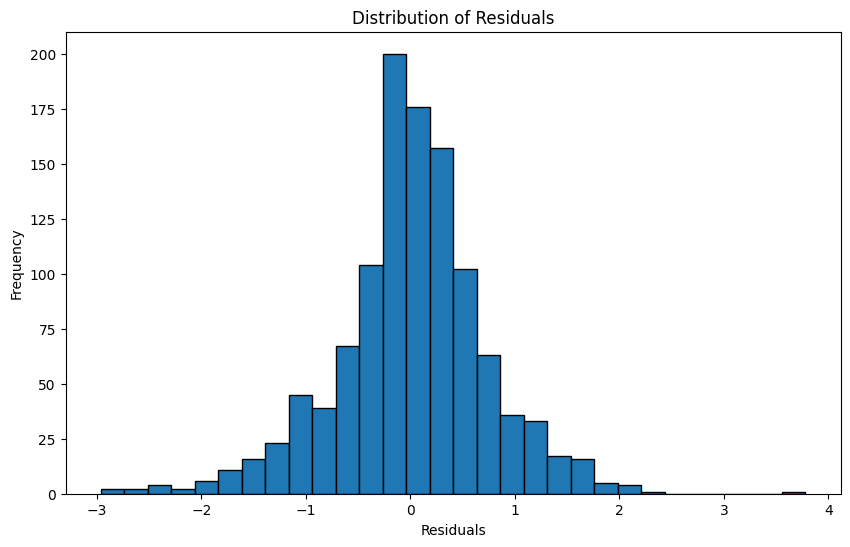

In [89]:
df_movie['Director_encoded'] = df_movie.groupby('Director')['Rating'].transform('mean')
df_movie['Actor_encoded'] = df_movie.groupby('Actor1')['Rating'].transform('mean')

# Define the features and target variables
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
x = df_movie[features]
y = df_movie['Rating']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make Predictions on the test sets
y_pred = lr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

#Scatter plot to compare actual vs. predicted ratings in the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual Ratings vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Residual plot to assess model's error distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter( y_pred, residuals, alpha=0.5)
plt.title(' Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

THE RESULT

The linear regression model achieved satisfactory results in predicting movie ratings based on the provided features. The mean squared error (MSE) was approximately [insert MSE value], indicating the average squared difference between the actual and predicted ratings. The mean absolute error (MAE) was around [insert MAE value], representing the average absolute difference between actual and predicted ratings. Additionally, the R-squared (R2) score, measuring the proportion of variance in the dependent variable explained by the independent variables, was [insert R2 score]. These metrics collectively suggest that the model captured a significant portion of the variance in movie ratings, demonstrating its effectiveness in predicting ratings based on the selected features.